# Importing libraries 

In [39]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep.eda import create_report

#### assigning dataframe to excel file

In [40]:
df = pd.read_excel(r"C:\Users\abdul\Desktop\df_data\Projects\Datasets\Content_2022-02-24_2023-02-23_Md.Abdul.xlsx")

C:\Users\abdul\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [41]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         365 non-null    object
 1   Impressions  365 non-null    int64 
 2   Engagements  365 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.7+ KB


In [42]:
#Changing date column to datetime
df['Date'] =  pd.to_datetime(df['Date'])

In [43]:
# I'm setting the index to date here, it will be easy for us later onwards
df.set_index("Date",inplace=True)

In [44]:
# I'm creating a new dataframe from 2022-08-02, becasue from this time onwards i was starting to get impressions and engagments!
new_df = df.loc['2022-08-01':]

In [45]:
#Describing the dataset 
df.describe()

,Impressions,Engagements
count,365.000000,365.000000
mean,8234.706849,26.383562
std,29629.403668,142.202401
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,29.000000,0.000000
75%,379.000000,4.000000
max,350167.000000,2448.000000


###### i'm Calculating the ratio of engagment to the number of impressions, Note that ratio > 2 percent is considered very good in linkedin community!

In [46]:
df['Eng_perc'] =  df["Engagements"] / df["Impressions"] * 100
df["Eng_perc"] = round(df.Eng_perc,2)

In [47]:
# From this point onwards we will use this dataframe only.
new_df["Eng_perc"] = new_df["Engagements"] / new_df["Impressions"] * 100 
new_df["Eng_perc"] = round(new_df.Eng_perc,2);

C:\Users\abdul\AppData\Local\Temp\ipykernel_27380\2805913407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Eng_perc"] = new_df["Engagements"] / new_df["Impressions"] * 100
C:\Users\abdul\AppData\Local\Temp\ipykernel_27380\2805913407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Eng_perc"] = round(new_df.Eng_perc,2);


In [48]:
new_df.fillna(0, inplace=True);

C:\Users\abdul\AppData\Local\Temp\ipykernel_27380\4214967226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.fillna(0, inplace=True);


<AxesSubplot: xlabel='Date'>

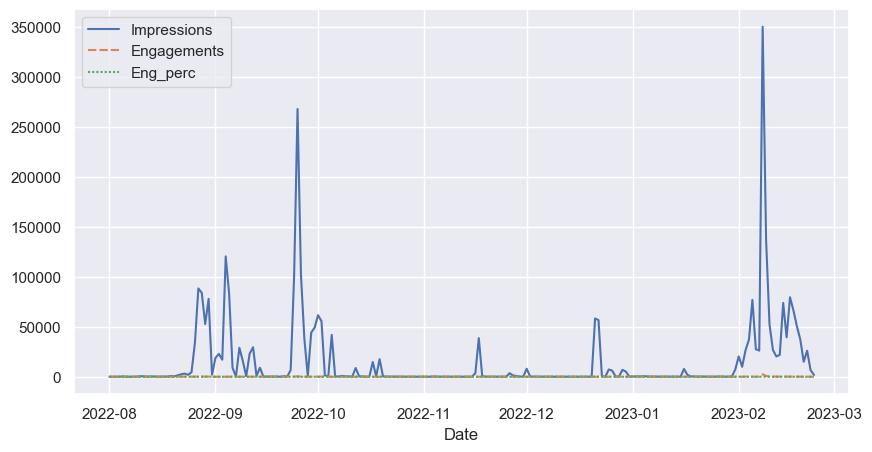

In [49]:
# i'm plotting the Impressions, Engagements, and engagment percent
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(data=new_df)

#### Lets Plot a scatterplot,  hmm it seems like there isnt a correlation between higher veiws and engagements in my linkedin profile 


<AxesSubplot: xlabel='Impressions', ylabel='Engagements'>

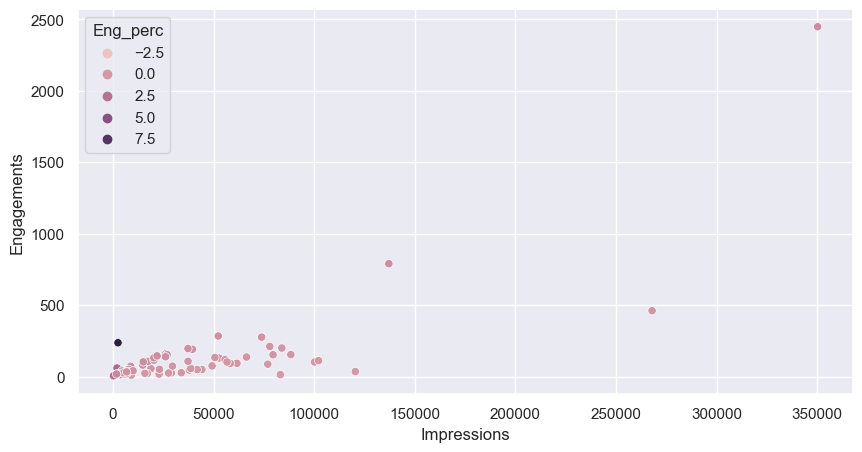

In [50]:
# plotting scatterplot on Impressions vs percent of engagment of impression,
# for example: 200 impressions, so 2 percent of 200 will be 4.  
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(y=new_df.Engagements, x=new_df.Impressions, hue= new_df.Eng_perc)

<AxesSubplot: >

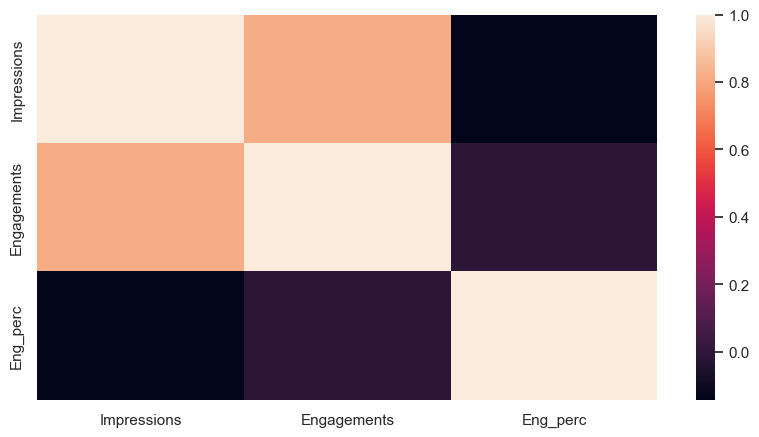

In [51]:
# There seems to be a correlation between Impressions and engagements!.
sns.heatmap(data=new_df.corr())

In [52]:
new_df.describe()

,Impressions,Engagements,Eng_perc
count,207.000000,207.000000,207.000000
mean,14519.879227,46.521739,0.820048
std,38203.961765,186.520303,1.340089
min,0.000000,-1.000000,-3.230000
25%,75.000000,0.000000,0.000000
50%,251.000000,2.000000,0.370000
75%,8389.000000,29.000000,1.020000
max,350167.000000,2448.000000,9.640000


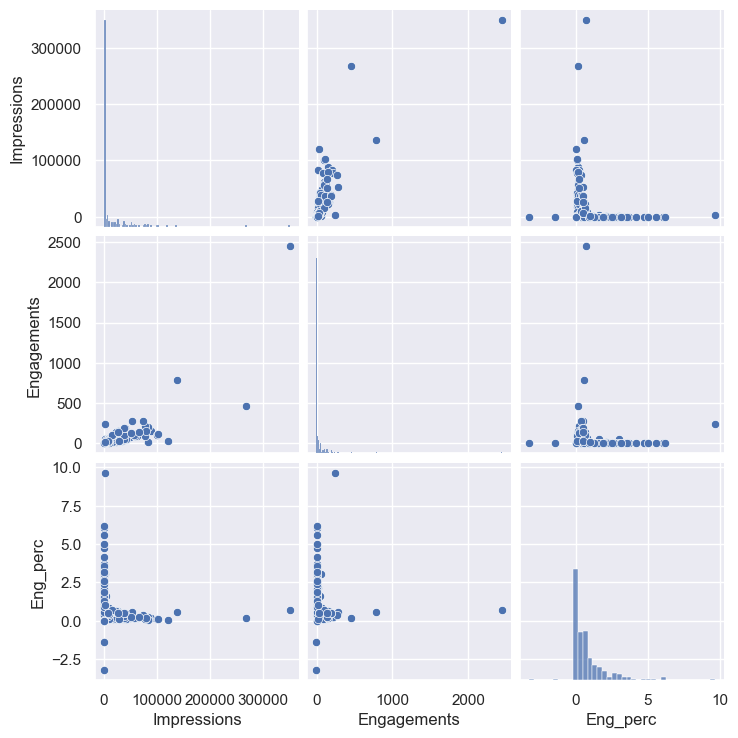

In [53]:
sns.pairplot(data=new_df)

<AxesSubplot: xlabel='Impressions', ylabel='Count'>

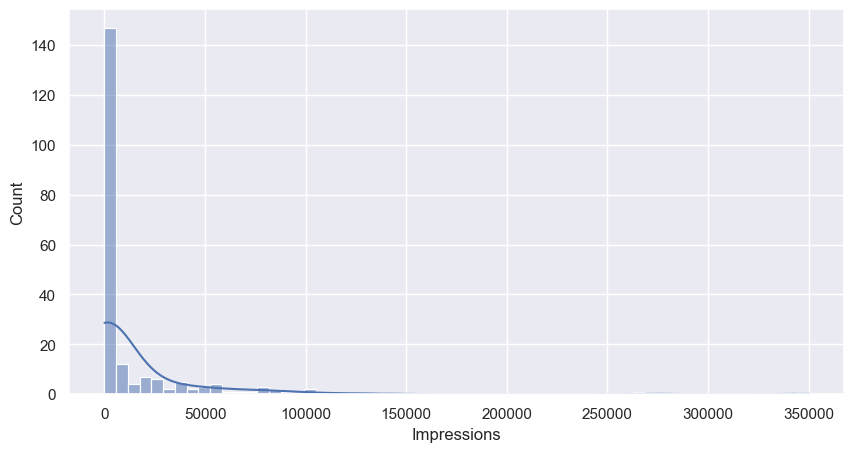

In [180]:
# # right skewed distribuition of engagemnts on post.
sns.histplot(data=new_df, x="Impressions", kde=True, bins=60)

<AxesSubplot: xlabel='Engagements', ylabel='Count'>

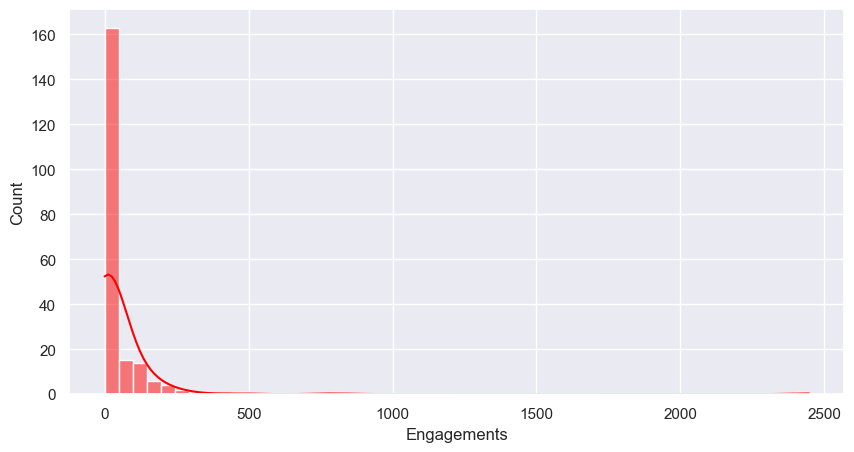

In [55]:
# right skewed distribuition of engagemnts on post 
sns.histplot(data=new_df, x="Engagements", kde=True, bins=50, color="red")

<AxesSubplot: xlabel='Date'>

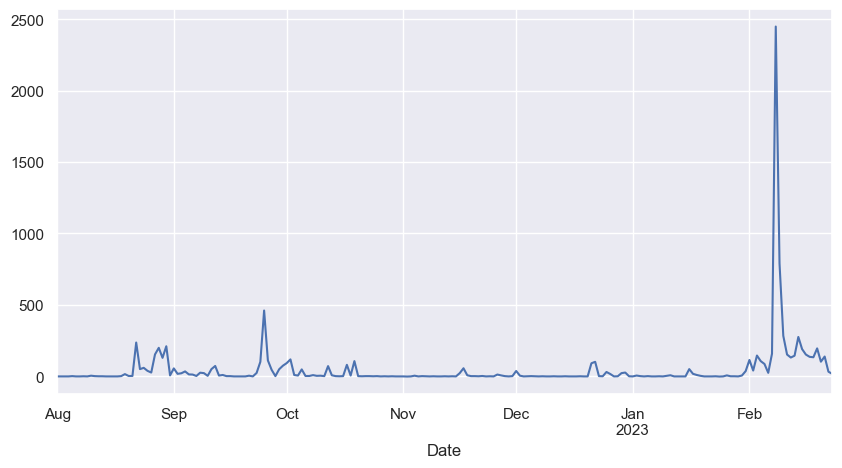

In [56]:
# it looks like a life line to me !
new_df.Engagements.plot()

In [57]:
new_df

,Impressions,Engagements,Eng_perc
Date,,,
2022-08-01,0,0,0.00
2022-08-02,0,0,0.00
2022-08-03,0,0,0.00
2022-08-04,176,0,0.00
2022-08-05,294,2,0.68
...,...,...,...
2023-02-19,37254,196,0.53
2023-02-20,14995,103,0.69
2023-02-21,26068,139,0.53


### Now i'm importing a new dataset, 
#### this one is releated to names, companies/organization, careers, and the date the users connected on!.

In [100]:
# i also have more data on my linkedin project
df3 = pd.read_csv(r"C:\Users\abdul\Desktop\df_data\Projects\Datasets\Connections.csv")

In [101]:
# changing names of column for bettering parsing.
df3.rename(columns={'Unnamed: 0': 'Name',
                    "Unnamed: 1" :"Last_name", 
                    "Unnamed: 2": "Email", 
                    "Unnamed: 3": "Organization",
                   "Unnamed: 4" : "Career",
                   "Unnamed: 5" : "Connected on"}, inplace=True)

In [102]:
df3.drop(index=0,inplace=True)

In [103]:
# i think for privacy protection i should drop the email varibale
df3.drop(columns="Email", inplace=True)

In [104]:
# now i'm starting EDA 
df3

,Name,Last_name,Organization,Career,Connected on
1,First Name,Last Name,Company,Position,Connected On
2,Raghunath,Ghosh,FEV Tutor,Mathematics Tutor,16-Feb-23
3,Richard,Sarpong,LEO Pharma,Data & Analytics Engineer,15-Feb-23
4,Jalil,Alizadeh,Digikala.com,Product Manager,15-Feb-23
5,Raqeeb,Shaikh,Analytics Vidhya,Content Writer,15-Feb-23
...,...,...,...,...,...
1012,Salam,Al Graee,Biztory,Analytics Consultant,25-Mar-21
1013,Tony,Sollund,Academic Work,Recruitment Consultant,25-Mar-21
1014,Madhur,Dixit,Johnson Controls,Assistant Manager,25-Mar-21
1015,Pushker,Ravindra,Bayer Crop Science,Data Science & Engineering Lead,22-Mar-21


In [105]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 1 to 1016
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          985 non-null    object
 1   Last_name     985 non-null    object
 2   Organization  921 non-null    object
 3   Career        922 non-null    object
 4   Connected on  1016 non-null   object
dtypes: object(5)
memory usage: 39.8+ KB


In [106]:
df3.loc[0] = df3.loc[1].values

In [107]:
df3.drop(index=1, inplace=True)

In [108]:
df3.reset_index(drop=True, inplace=True)

In [109]:
df3

,Name,Last_name,Organization,Career,Connected on
0,Raghunath,Ghosh,FEV Tutor,Mathematics Tutor,16-Feb-23
1,Richard,Sarpong,LEO Pharma,Data & Analytics Engineer,15-Feb-23
2,Jalil,Alizadeh,Digikala.com,Product Manager,15-Feb-23
3,Raqeeb,Shaikh,Analytics Vidhya,Content Writer,15-Feb-23
4,Juan David,Linares Santana,GEO Studio,Partner,15-Feb-23
...,...,...,...,...,...
1011,Tony,Sollund,Academic Work,Recruitment Consultant,25-Mar-21
1012,Madhur,Dixit,Johnson Controls,Assistant Manager,25-Mar-21
1013,Pushker,Ravindra,Bayer Crop Science,Data Science & Engineering Lead,22-Mar-21
1014,Tannaz,Safai,NaN,NaN,03-Feb-20


In [110]:
company = df3['Organization'].value_counts().head(30)

<AxesSubplot: >

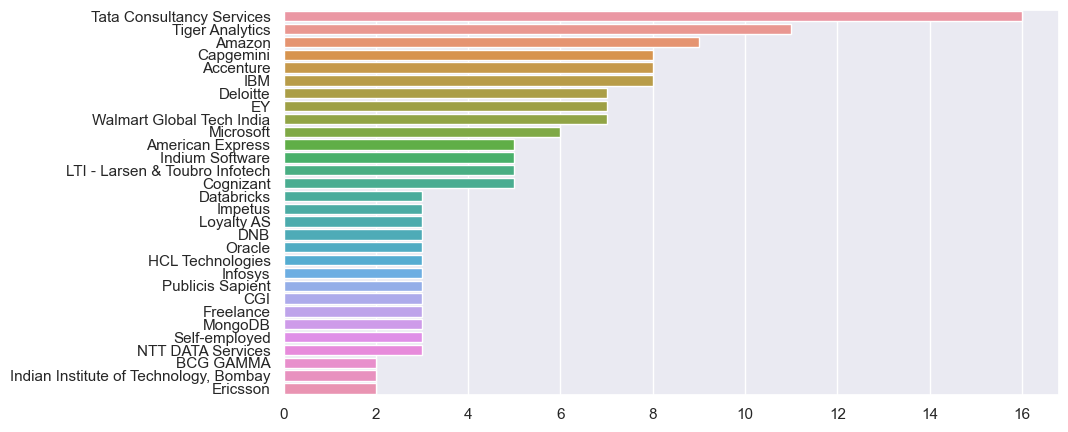

In [111]:
# i plotted the top 30 companies my profile is appearing on..
sns.barplot(y=company.index, x=company.values, orient="h")

In [112]:
from wordcloud import WordCloud  

In [113]:
text = df3["Career"].value_counts()

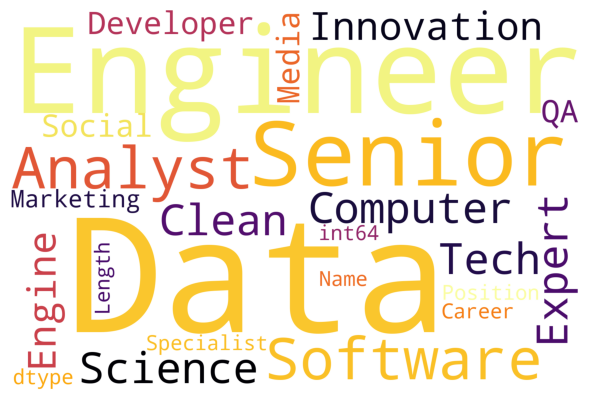

In [114]:
# most common words in my linkedin profile
wordcloud = WordCloud(width=1800, height=1200, background_color='white', colormap='inferno', min_font_size=10).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [115]:
# fixing a string value in a date column 
df3.iloc[1,-1] = np.nan

In [116]:
df3

,Name,Last_name,Organization,Career,Connected on
0,Raghunath,Ghosh,FEV Tutor,Mathematics Tutor,16-Feb-23
1,Richard,Sarpong,LEO Pharma,Data & Analytics Engineer,NaN
2,Jalil,Alizadeh,Digikala.com,Product Manager,15-Feb-23
3,Raqeeb,Shaikh,Analytics Vidhya,Content Writer,15-Feb-23
4,Juan David,Linares Santana,GEO Studio,Partner,15-Feb-23
...,...,...,...,...,...
1011,Tony,Sollund,Academic Work,Recruitment Consultant,25-Mar-21
1012,Madhur,Dixit,Johnson Controls,Assistant Manager,25-Mar-21
1013,Pushker,Ravindra,Bayer Crop Science,Data Science & Engineering Lead,22-Mar-21
1014,Tannaz,Safai,NaN,NaN,03-Feb-20


<AxesSubplot: >

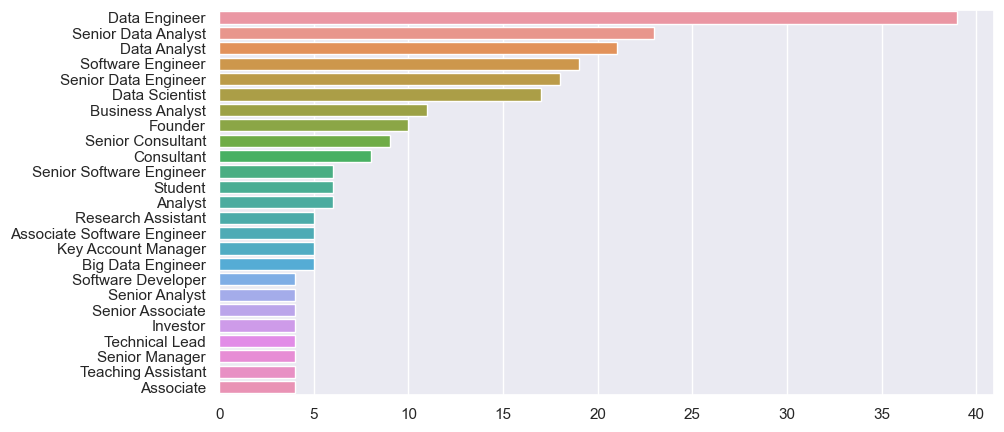

In [117]:
#  most common careers in my connections!
career = df3.Career.value_counts().head(25)
sns.barplot(y=career.index, x=career.values)

In [118]:
df3.iloc[-1,-1] = np.nan

In [121]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          985 non-null    object
 1   Last_name     985 non-null    object
 2   Organization  921 non-null    object
 3   Career        922 non-null    object
 4   Connected on  1014 non-null   object
dtypes: object(5)
memory usage: 39.8+ KB


In [123]:
df3["Connected on"] = pd.to_datetime(df3["Connected on"])

In [129]:
df3.loc[1015] = np.nan

In [130]:
df3

,Name,Last_name,Organization,Career,Connected on
0,Raghunath,Ghosh,FEV Tutor,Mathematics Tutor,2023-02-16
1,Richard,Sarpong,LEO Pharma,Data & Analytics Engineer,NaT
2,Jalil,Alizadeh,Digikala.com,Product Manager,2023-02-15
3,Raqeeb,Shaikh,Analytics Vidhya,Content Writer,2023-02-15
4,Juan David,Linares Santana,GEO Studio,Partner,2023-02-15
...,...,...,...,...,...
1011,Tony,Sollund,Academic Work,Recruitment Consultant,2021-03-25
1012,Madhur,Dixit,Johnson Controls,Assistant Manager,2021-03-25
1013,Pushker,Ravindra,Bayer Crop Science,Data Science & Engineering Lead,2021-03-22
1014,Tannaz,Safai,NaN,NaN,2020-02-03


<AxesSubplot: xlabel='Connected on', ylabel='Count'>

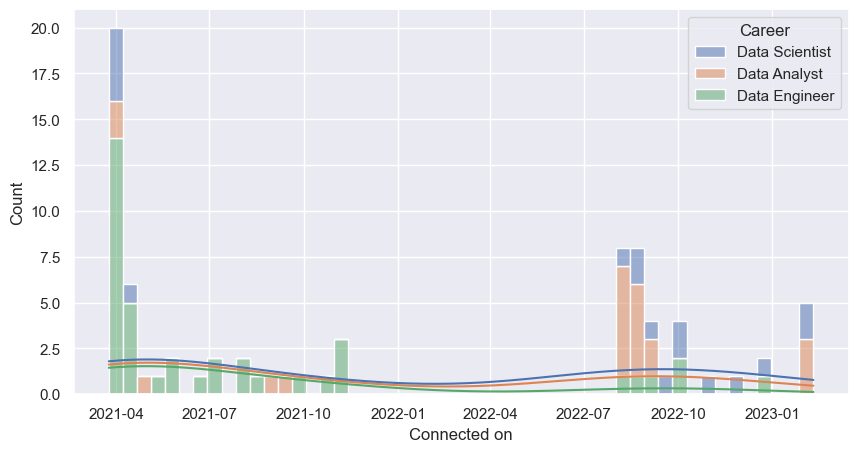

In [171]:
# this graph shows the date distribuition of the time i had connected with people of linkedin, 
# and showing the spilit difference between data jobs!
filtered_df = df3[df3["Career"].isin(["Data Analyst", "Data Engineer","Data Scientist"])]

# Plot a histogram of the "Connected on" column with "Career" as the grouping variable
sns.histplot(data=filtered_df, x="Connected on", hue="Career", kde=True, bins=50,multiple ='stack')

<AxesSubplot: xlabel='Connected on', ylabel='Count'>

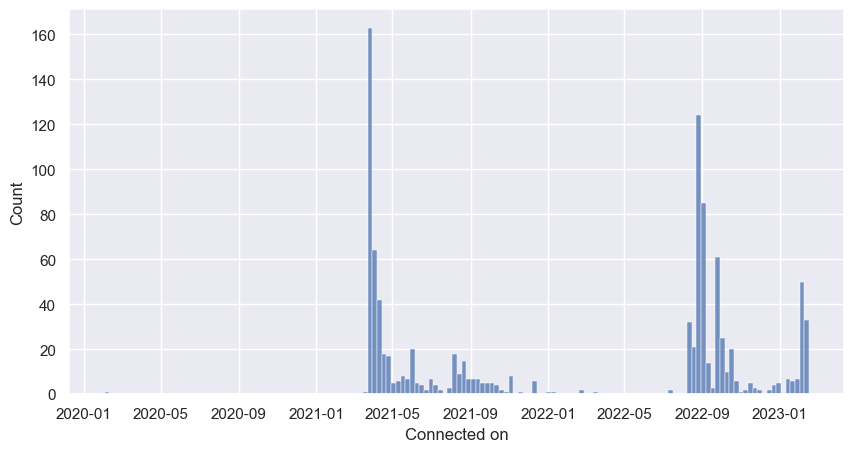

In [166]:
sns.histplot(df3["Connected on"], bins=150)

In [175]:
df3["Connected on"].describe()

C:\Users\abdul\AppData\Local\Temp\ipykernel_27380\3611017701.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df3["Connected on"].describe()


count                    1014
unique                    239
top       2021-03-26 00:00:00
freq                       49
first     2020-02-03 00:00:00
last      2023-02-16 00:00:00
Name: Connected on, dtype: object

In [176]:
df3

,Name,Last_name,Organization,Career,Connected on
0,Raghunath,Ghosh,FEV Tutor,Mathematics Tutor,2023-02-16
1,Richard,Sarpong,LEO Pharma,Data & Analytics Engineer,NaT
2,Jalil,Alizadeh,Digikala.com,Product Manager,2023-02-15
3,Raqeeb,Shaikh,Analytics Vidhya,Content Writer,2023-02-15
4,Juan David,Linares Santana,GEO Studio,Partner,2023-02-15
...,...,...,...,...,...
1011,Tony,Sollund,Academic Work,Recruitment Consultant,2021-03-25
1012,Madhur,Dixit,Johnson Controls,Assistant Manager,2021-03-25
1013,Pushker,Ravindra,Bayer Crop Science,Data Science & Engineering Lead,2021-03-22
1014,Tannaz,Safai,NaN,NaN,2020-02-03
